# BBC Dataset demo
This demo uses a freely available dataset from the BBC (http://mlg.ucd.ie/datasets/bbc.html). We will use this dataset as an example to automatcly cluster documents.

## Download and extract dataset
We will use the raw text dataset. We fill first download the ZIP if not done already and then extract it

In [1]:
from urllib.request import urlretrieve
from zipfile import ZipFile
import os

srcUrl = 'http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip'

# Create folder if it doesn't exists
if not os.path.exists('./bbc-corpus'):
    print("Create bbc-corpus folder")
    os.makedirs('./bbc-corpus')

# Check for existance of ZIP file
if not os.path.exists('./bbc-corpus/bbc-fulltext.zip'):
    print("Download %s" % srcUrl)
    urlretrieve(srcUrl, './bbc-corpus/bbc-fulltext.zip')
    
# Extract zipFile
with ZipFile('./bbc-corpus/bbc-fulltext.zip', 'r') as zipFile:
    print("Extract %d files from bbc-fulltext.zip" % len(zipFile.namelist()))
    zipFile.extractall('./bbc-corpus')

Extract 2232 files from bbc-fulltext.zip


## Extract titles and text body
We will go trough all the files and extract the titles and the body of each file.

In [2]:
# Create two lists
item_titles = []
item_texts = []

# Go trough folders and trough files
for subfolder in [ x for x in os.listdir('./bbc-corpus/bbc') if os.path.isdir('./bbc-corpus/bbc/' + x) ]:
    for filename in os.listdir('./bbc-corpus/bbc/' + subfolder):
        full_filename = './bbc-corpus/bbc/' + subfolder + '/' + filename            
        file_contents = open(full_filename, 'r', encoding='iso 8859-15').read().split('\n')
        
        # First line is title, then a empty line and then the main body
        item_titles.append(file_contents[0])
        item_texts.append('\n'.join(file_contents[2:]))

        
# Test output
print(item_titles[0])
print("%s..." % item_texts[0][:100])

Japanese growth grinds to a halt
Growth in Japan evaporated in the three months to September, sparking renewed concern about an econo...


## Cleanup item texts
Cleanup the texts by first removing all non alpha characters. Change it to lowercase. And finally remove all stopwords. 

In [3]:
import re
from nltk.corpus import stopwords

for idx, item_text in enumerate(item_texts):
    # Remove all non alpha characters and change it to lowercase
    letters_only = re.sub('[^a-zA-Z]', ' ', item_texts[idx])
    
    # Split into words by space
    words = letters_only.lower().split()
    
    # Remove stopwords
    stopwords_eng = set(stopwords.words("english"))    
    useful_words = [x for x in words if not x in stopwords_eng]
    
    # Store result
    item_texts[idx] = ' '.join(useful_words)
    
# Test output
print(item_texts[0])

growth japan evaporated three months september sparking renewed concern economy long decade long trough output period grew annual rate exports usual engine recovery faltered domestic demand stayed subdued corporate investment also fell short growth falls well short expectations mark sixth straight quarter expansion economy stagnated throughout experiencing brief spurts expansion amid long periods doldrums one result deflation prices falling rather rising made japanese shoppers cautious kept spending effect leave economy dependent ever exports recent recovery high oil prices knocked growth rate falling dollar means products shipped us becoming relatively expensive performance third quarter marks sharp downturn earlier year first quarter showed annual growth second showing economists predicting much time around exports slowed capital spending became weaker said hiromichi shirakawa chief economist ubs securities tokyo personal consumption looks good mainly due temporary factors olympics a

## Create Tf-Idf vectors for all document terms
Tf-Idf stands for *term frequency–inverse document frequency*. It is a numerical statistic that is intended to reflect how important a word is to a document in a collection. Words that are mentioned a lot in a document but are not mentioned in the whole collection are deemed important. Also words that are mentioned but are very common in the whole collection are not so important.

In [4]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def stem_words(words_list, stemmer):
    return [stemmer.stem(word) for word in words_list]

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_words(tokens, stemmer)
    return stems

# Create Tf-Idf vectors from our item_texts
tfidf = TfidfVectorizer(tokenizer=tokenize)
tfs = tfidf.fit_transform(item_texts)

# Test output
print(tfs)

  (0, 7133)	0.218470684903
  (0, 8712)	0.136909168682
  (0, 5550)	0.113098313618
  (0, 16881)	0.0385419019516
  (0, 11086)	0.0386251823441
  (0, 14940)	0.0626387440576
  (0, 15708)	0.0816087970457
  (0, 13920)	0.0857085790592
  (0, 3418)	0.0529644307262
  (0, 5081)	0.228111253998
  (0, 9902)	0.140215681114
  (0, 4156)	0.0709502279929
  (0, 17270)	0.118725961263
  (0, 12106)	0.0786200974898
  (0, 12583)	0.12745195745
  (0, 7082)	0.0786200974898
  (0, 672)	0.126468036854
  (0, 13599)	0.11194906401
  (0, 5664)	0.212277233933
  (0, 17840)	0.0729924498446
  (0, 5340)	0.0713392093451
  (0, 13729)	0.150142768758
  (0, 5762)	0.105538661616
  (0, 4758)	0.0713392093451
  (0, 4276)	0.0546176712257
  :	:
  (2224, 7362)	0.079221984841
  (2224, 6273)	0.0611749242493
  (2224, 5009)	0.0913950019263
  (2224, 589)	0.0733707070073
  (2224, 3789)	0.0774562581156
  (2224, 10252)	0.0563995931765
  (2224, 18154)	0.0477043850245
  (2224, 16782)	0.105315144417
  (2224, 12002)	0.0607865972183
  (2224, 12408)	0.

## See some nearest neighbors
We will use nearest neighbors to see if by using cosine similarity we actually get usefull correlations.

In [5]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neigh = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)
neigh.fit(tfs)

bill_id = 25

print(item_titles[bill_id])
for x in neigh.kneighbors(tfs[bill_id], return_distance=False).reshape([ -1 ]):
    print(" - %s (#%d)" % (item_titles[x], x))

Market unfazed by Aurora setback
 - Market unfazed by Aurora setback (#25)
 - Peer-to-peer nets 'here to stay' (#1657)
 - Peer-to-peer nets 'here to stay' (#1578)
 - Booming markets shed few tears (#217)
 - Google shares fall as staff sell (#273)
 - Metlife buys up Citigroup insurer (#47)
 - Oil prices reach three-month low (#40)
 - Irish markets reach all-time high (#398)
 - Seamen sail into biometric future (#1715)
 - Seamen sail into biometric future (#1722)


## Make clusters
We will use K-means with Cosine Distance as distance metric. 

In [6]:
from nltk.cluster.kmeans import KMeansClusterer
from numpy.random import RandomState
import random

# Use a static random state to make the output reproducable
random.seed(100)

# Define number of clusters
k = 100

# Get K-means cluster with cosine as distance metrix

kclusterer = KMeansClusterer(k, distance=nltk.cluster.util.cosine_distance, rng=random)

# Get assigned clusers (use toarray() to get normal array, sparse-array seems to trigger an exception)
assigned_clusters = kclusterer.cluster(tfs.toarray(), assign_clusters=True)

## See cluster size distribution
As the number of clusters is just choosen arbirtrary lets see the distribution of cluster sizes. In this case we don't expect a complete flat distribution as we can expect some news to be more prominant then others.

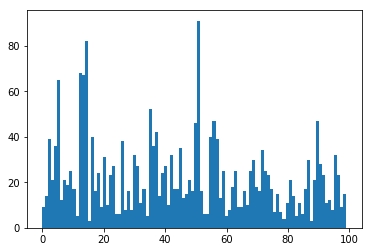

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(assigned_clusters, bins=k)
plt.show()

In [8]:
test_k = 3
for x in range(0, len(item_titles)):
    if assigned_clusters[x] == test_k:
        print(" - %s" % item_titles[x])

 - Wenger shock at Newcastle dip
 - Arsenal through on penalties
 - Chelsea hold Arsenal
 - Premier League planning Cole date
 - Wenger dejected as Arsenal slump
 - Wenger steps up row
 - Aragones angered by racism fine
 - Cole refuses to blame van Persie
 - Wenger signs new deal
 - Klinsmann issues Lehmann warning
 - Wenger keeping faith with Almunia
 - Robben and Cole earn Chelsea win
 - Wenger handed summer war chest
 - Edu describes tunnel fracas
 - Campbell rescues Arsenal
 - Campbell lifts lid on United feud
 - Prutton poised for lengthy FA ban
 - Ferguson urges Henry punishment
 - Wenger rules out new keeper
 - Highbury tunnel players in clear
 - Van Nistelrooy set to return
